# Linear matter power spectra from class-seos 
## Comparison between LCDM and SEoS model

Details for SEoS model can be found in  arXiv:1708.08529 

In [1]:
%pylab inline
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


## Loading the files from class

In [18]:

#### array name: pk_model_bfv_zvalue #####
#### pk_details, common to all:

planck = 'pTTlP'
#pola = ''

#------------------ SEoS --------------------#
seospath = './../output/seos/seos'
# SEOS - seos
pk_s_s_z0 = np.loadtxt(seospath+'bfv_z1_pk.dat')
pk_s_s_z028 = np.loadtxt(seospath+'bfv_z2_pk.dat')
pk_s_s_z1 = np.loadtxt(seospath+'bfv_z4_pk.dat')
pk_s_s_z99 = np.loadtxt(seospath+'bfv_z6_pk.dat')

#SEOS - Planck TT 
pk_s_pTT_z0 = np.loadtxt(seospath+'pTTlP_z1_pk.dat')
pk_s_pTT_z028 = np.loadtxt(seospath+'pTTlP_z2_pk.dat')
pk_s_pTT_z1 = np.loadtxt(seospath+'pTTlP_z4_pk.dat')
pk_s_pTT_z99 = np.loadtxt(seospath+'pTTlP_z6_pk.dat')


#SEOS - Planck TT + TE + EE
pk_s_pTE_z0 = np.loadtxt(seospath+'pTTTEEElP_z1_pk.dat')
pk_s_pTE_z028 = np.loadtxt(seospath+'pTTTEEElP_z2_pk.dat')
pk_s_pTE_z1 = np.loadtxt(seospath+'pTTTEEElP_z4_pk.dat')
pk_s_pTE_z99 = np.loadtxt(seospath+'pTTTEEElP_z6_pk.dat')


#----------------    LCDM  ------------------------#
lcdmpath = './../output/lcdm/lcdm'

#LCDM - seos
pk_l_s_z0 = np.loadtxt(lcdmpath+'seosbfv_z1_pk.dat')
pk_l_s_z028 = np.loadtxt(lcdmpath+'seosbfv_z2_pk.dat')
pk_l_s_z1 = np.loadtxt(lcdmpath+'seosbfv_z4_pk.dat')
pk_l_s_z99 = np.loadtxt(lcdmpath+'seosbfv_z6_pk.dat')


#LCDM - Planck TT
pk_l_pTT_z0 = np.loadtxt(lcdmpath+'pTTlP_z1_pk.dat')
pk_l_pTT_z028 = np.loadtxt(lcdmpath+'pTTlP_z2_pk.dat')
pk_l_pTT_z1 = np.loadtxt(lcdmpath+'pTTlP_z4_pk.dat')
pk_l_pTT_z99 = np.loadtxt(lcdmpath+'pTTlP_z6_pk.dat')


#LCDM - Planck TT + TE + EE
pk_l_pTE_z0 = np.loadtxt(lcdmpath+'pTTTEEElP_z1_pk.dat')
pk_l_pTE_z028 = np.loadtxt(lcdmpath+'pTTTEEElP_z2_pk.dat')
pk_l_pTE_z1 = np.loadtxt(lcdmpath+'pTTTEEElP_z4_pk.dat')
pk_l_pTE_z99 = np.loadtxt(lcdmpath+'pTTTEEElP_z6_pk.dat')


IOError: ./../output/lcdm/lcdmseosbfv_z1_pk.dat not found.

## Figures

In [7]:
class FancyFormatter(Formatter):
    '''Formatter for values with LaTeX fonts'''
    
    def __call__(self, v, pos=None):
        return r'${:.5G}$'.format(v)
    
    def format_data_short(self, value):
        return '{:.1f}'.format(value)


    
label_l = r'$\Lambda CDM$'
label_s = r'SEoS'
ls_l = '--'
ls_s = ':'
figspath = './../figs/'

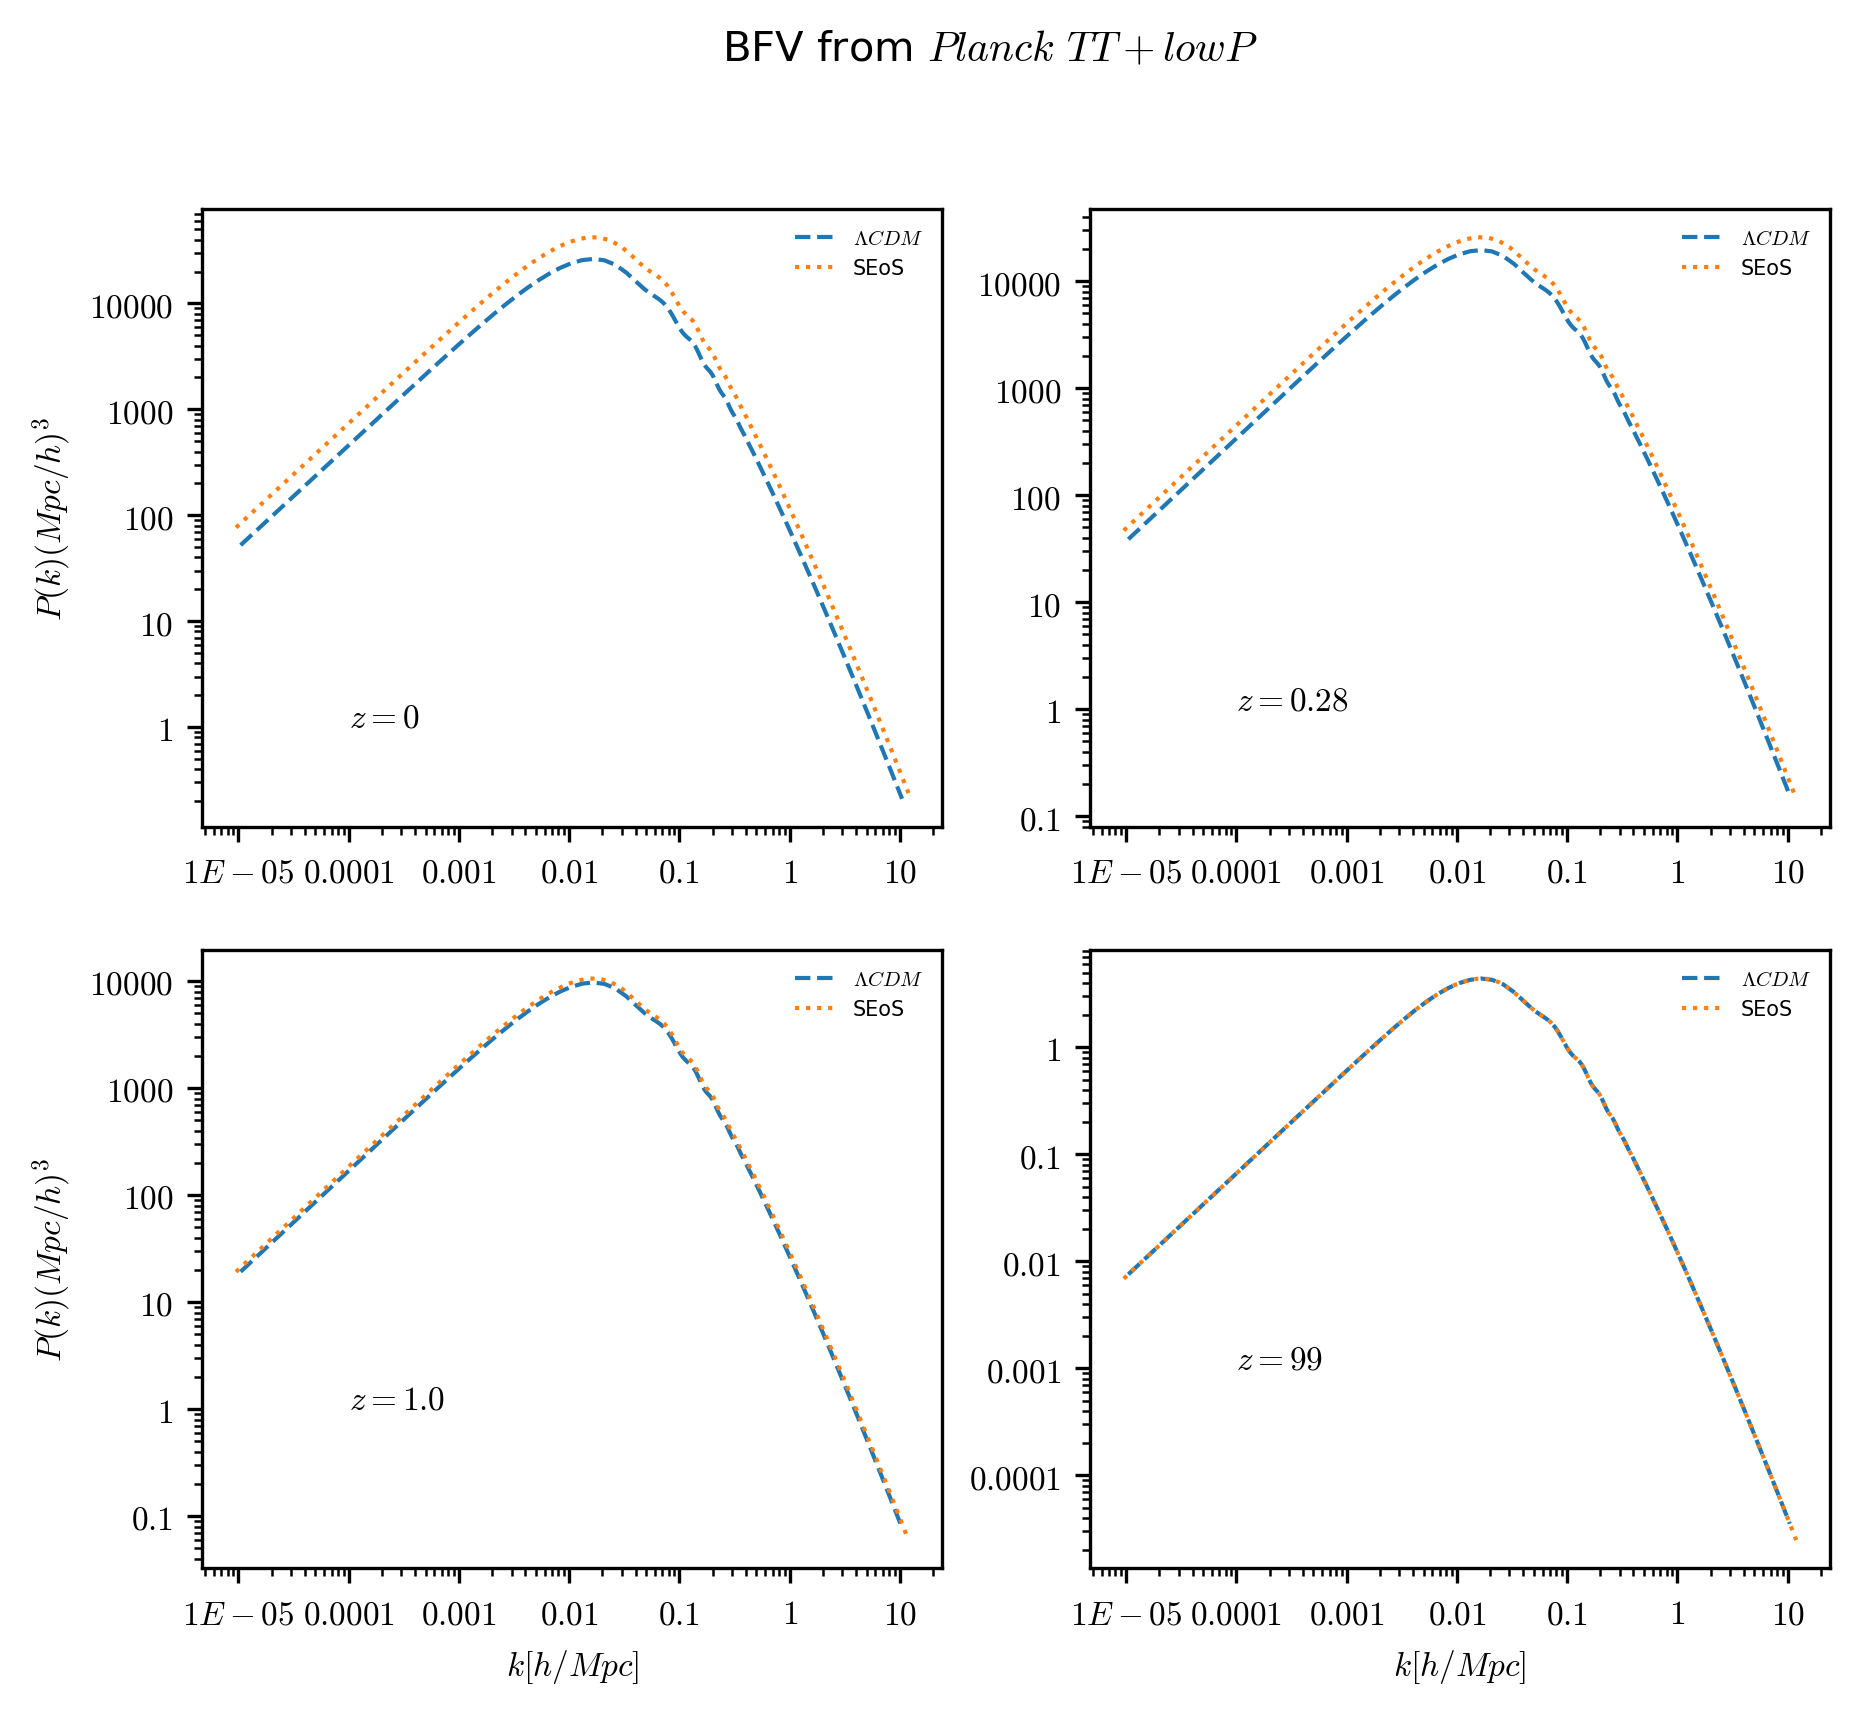

In [9]:
fig = plt.figure(figsize=(7,6), dpi=300)
rcParams['font.size'] = 8
rcParams['lines.linewidth'] = 1
rcParams['mathtext.fontset'] = 'cm'

fig.suptitle(r'BFV from $Planck$ $TT+lowP$', fontsize=10)

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

ax1.text(1e-4,1,r'$z=0$')
ax1.plot(pk_l_pTT_z0[:,0], pk_l_pTT_z0[:,1], label=label_l, ls=ls_l)
ax1.plot(pk_s_pTT_z0[:,0],pk_s_pTT_z0[:,1], label=label_s, ls = ls_s)
ax1.legend(loc='best', frameon=False, prop={'size':5})
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$P(k)(Mpc/h)^3$')
ax1.xaxis.set_major_formatter(FancyFormatter())
ax1.yaxis.set_major_formatter(FancyFormatter())

ax2.text(1e-4,1,r'$z=0.28$')
ax2.plot(pk_l_pTT_z028[:,0], pk_l_pTT_z028[:,1], label=label_l,ls=ls_l)
ax2.plot(pk_s_pTT_z028[:,0],pk_s_pTT_z028[:,1], label=label_s,ls=ls_s)
ax2.legend(loc='best', frameon=False, prop={'size':5})
ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.set_xlabel(r'$k[h/Mpc]$')
ax2.xaxis.set_major_formatter(FancyFormatter())
ax2.yaxis.set_major_formatter(FancyFormatter())

ax3.text(1e-4,1,r'$z=1.0$')
ax3.plot(pk_l_pTT_z1[:,0], pk_l_pTT_z1[:,1], label=label_l,ls=ls_l)
ax3.plot(pk_s_pTT_z1[:,0],pk_s_pTT_z1[:,1], label=label_s,ls=ls_s)
ax3.legend(loc='best', frameon=False, prop={'size':5})
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel(r'$P(k)(Mpc/h)^3$')
ax3.set_xlabel(r'$k[h/Mpc]$')
ax3.xaxis.set_major_formatter(FancyFormatter())
ax3.yaxis.set_major_formatter(FancyFormatter())

ax4.text(1e-4,1e-3,r'$z=99$')
ax4.plot(pk_l_pTT_z99[:,0], pk_l_pTT_z99[:,1], label=label_l,ls=ls_l)
ax4.plot(pk_s_pTT_z99[:,0],pk_s_pTT_z99[:,1], label=label_s,ls=ls_s)
ax4.legend(loc='best', frameon=False, prop={'size':5})
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlabel(r'$k[h/Mpc]$')
ax4.xaxis.set_major_formatter(FancyFormatter())
ax4.yaxis.set_major_formatter(FancyFormatter())

#plt.savefig(figspath+'pk_bfv-pTTlP.pdf', bbox_inches ='tight')

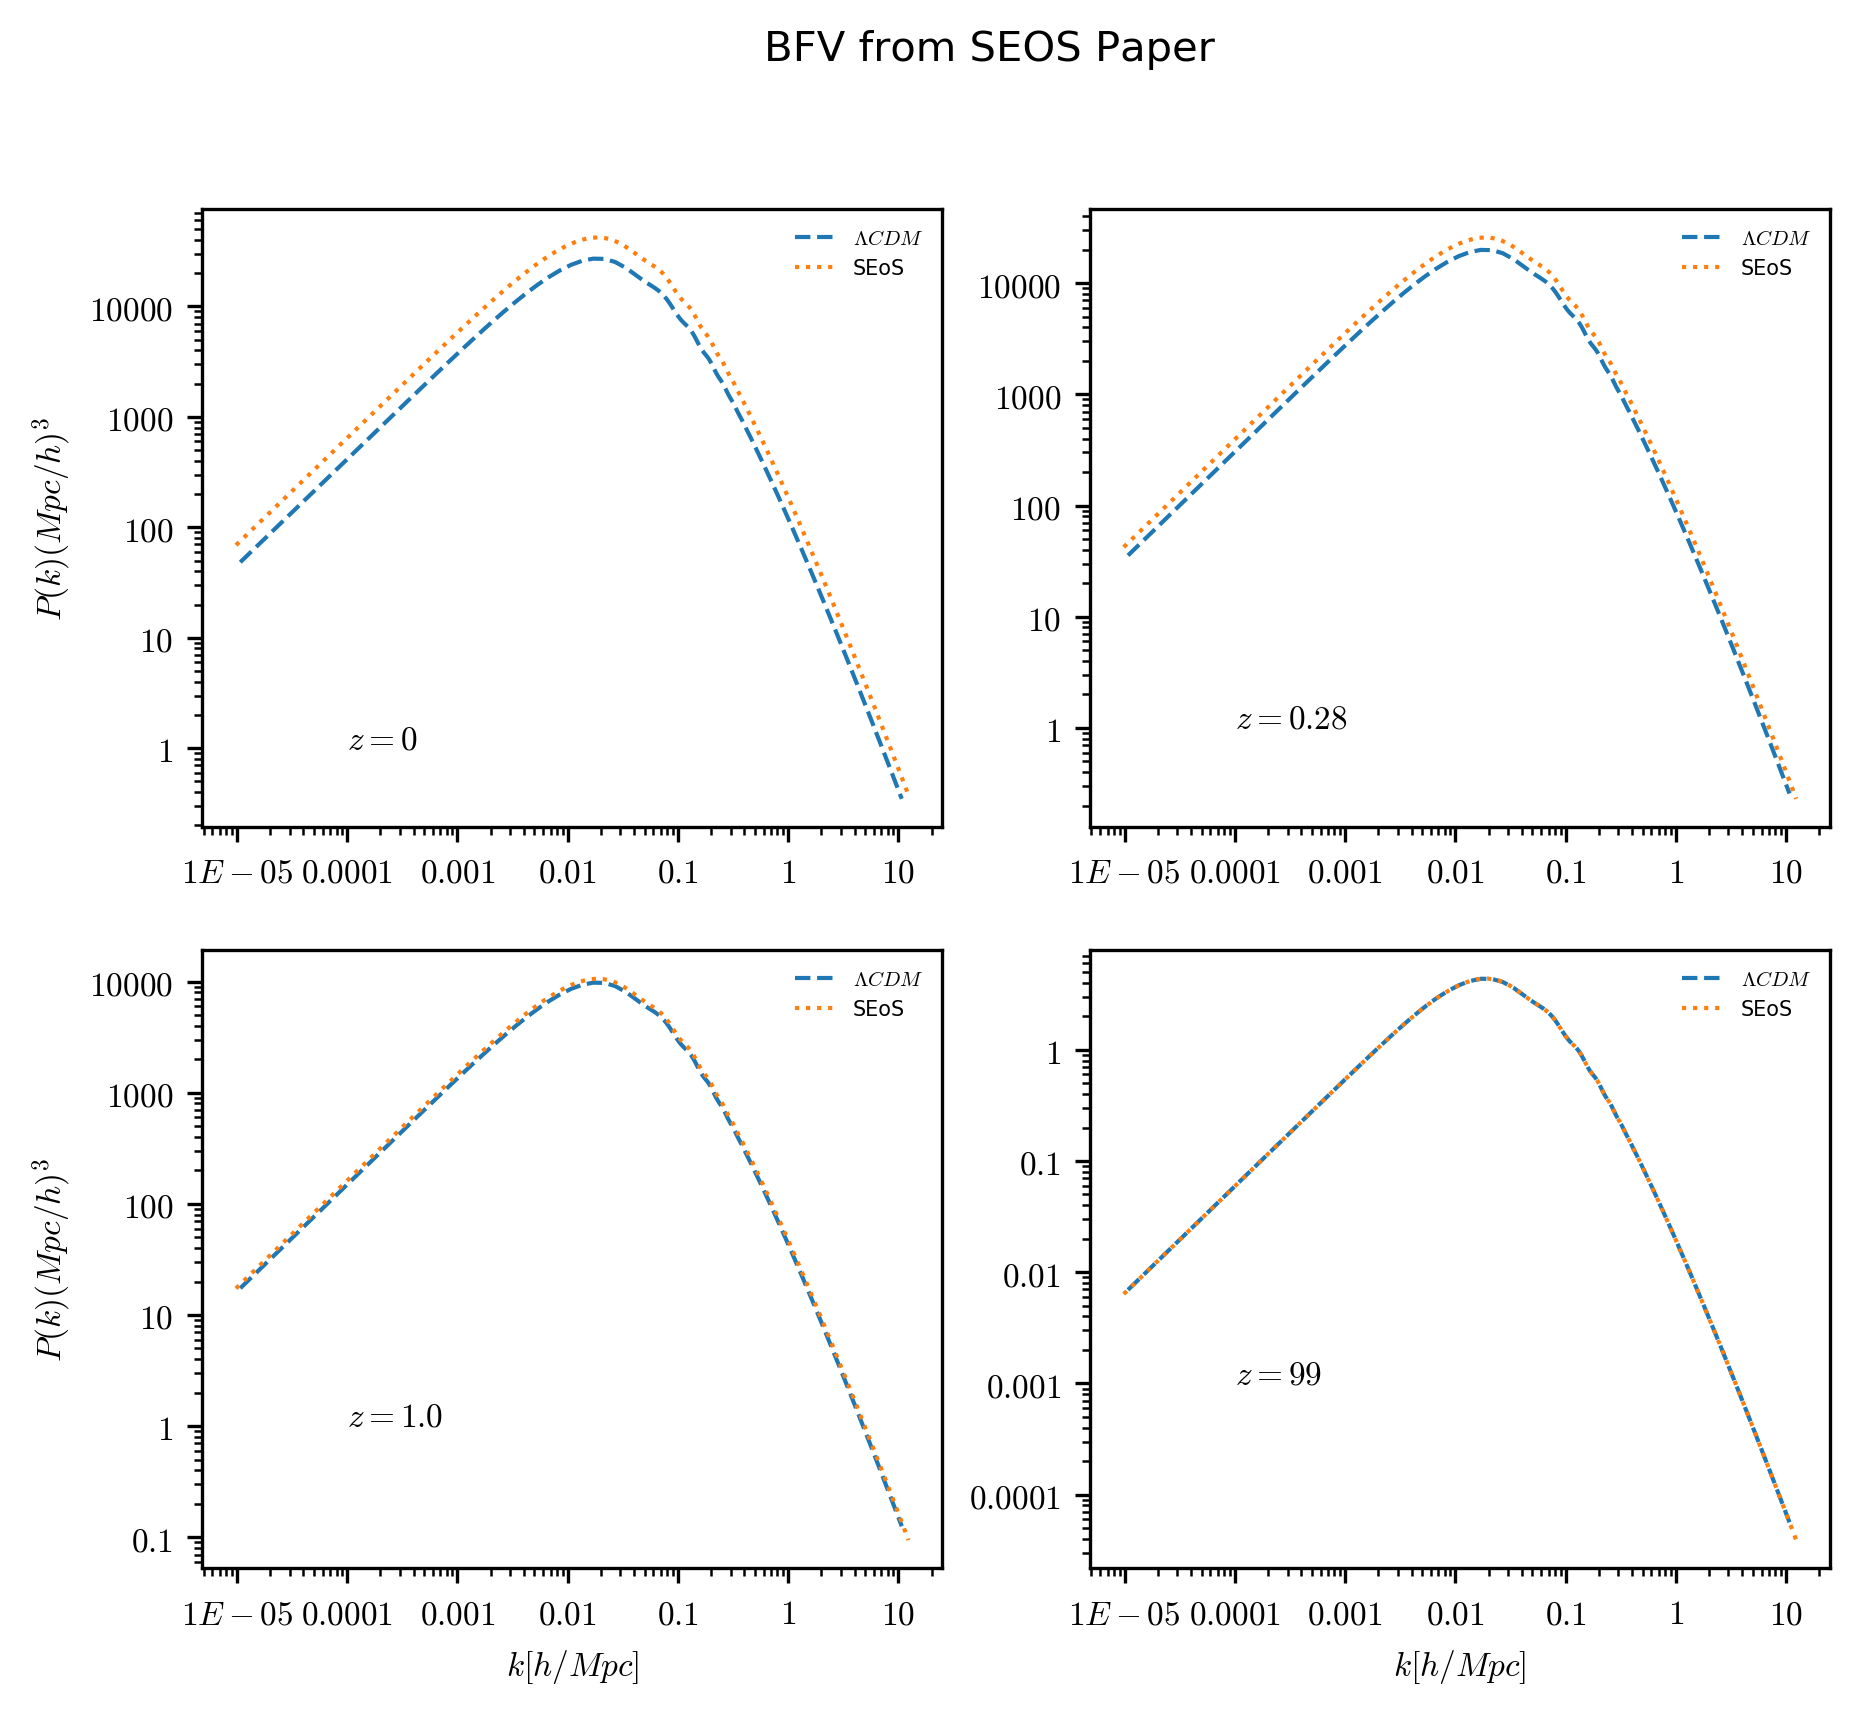

In [11]:
fig = plt.figure(figsize=(7,6), dpi=300)
rcParams['font.size'] = 8
rcParams['lines.linewidth'] = 1
rcParams['mathtext.fontset'] = 'cm'

fig.suptitle(r'BFV from SEOS Paper', fontsize=10)

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

ax1.text(1e-4,1,r'$z=0$')

ax1.plot(pk_l_s_z0[:,0], pk_l_s_z0[:,1], label=label_l,ls=ls_l)
ax1.plot(pk_s_s_z0[:,0], pk_s_s_z0[:,1], label=label_s,ls=ls_s)
ax1.legend(loc='best', frameon=False, prop={'size':5})
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$P(k)(Mpc/h)^3$')
#ax1.set_xlabel(r'$k[h/Mpc]$')
ax1.xaxis.set_major_formatter(FancyFormatter())
ax1.yaxis.set_major_formatter(FancyFormatter())

ax2.text(1e-4,1,r'$z=0.28$')
ax2.plot(pk_l_s_z028[:,0], pk_l_s_z028[:,1], label=label_l,ls=ls_l)
ax2.plot(pk_s_s_z028[:,0], pk_s_s_z028[:,1], label=label_s,ls=ls_s)
ax2.legend(loc='best', frameon=False, prop={'size':5})
ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.set_xlabel(r'$k[h/Mpc]$')
ax2.xaxis.set_major_formatter(FancyFormatter())
ax2.yaxis.set_major_formatter(FancyFormatter())

ax3.text(1e-4,1,r'$z=1.0$')
ax3.plot(pk_l_s_z1[:,0], pk_l_s_z1[:,1], label=label_l,ls=ls_l)
ax3.plot(pk_s_s_z1[:,0], pk_s_s_z1[:,1], label=label_s,ls=ls_s)
ax3.legend(loc='best', frameon=False, prop={'size':5})
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel(r'$P(k)(Mpc/h)^3$')
ax3.set_xlabel(r'$k[h/Mpc]$')
ax3.xaxis.set_major_formatter(FancyFormatter())
ax3.yaxis.set_major_formatter(FancyFormatter())

ax4.text(1e-4,1e-3,r'$z=99$')
ax4.plot(pk_l_s_z99[:,0], pk_l_s_z99[:,1], label=label_l,ls=ls_l)
ax4.plot(pk_s_s_z99[:,0], pk_s_s_z99[:,1], label=label_s,ls=ls_s)
ax4.legend(loc='best', frameon=False, prop={'size':5})
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlabel(r'$k[h/Mpc]$')
ax4.xaxis.set_major_formatter(FancyFormatter())
ax4.yaxis.set_major_formatter(FancyFormatter())

#plt.savefig(figspath+'pk_bfv-seos.pdf', bbox_inches ='tight')

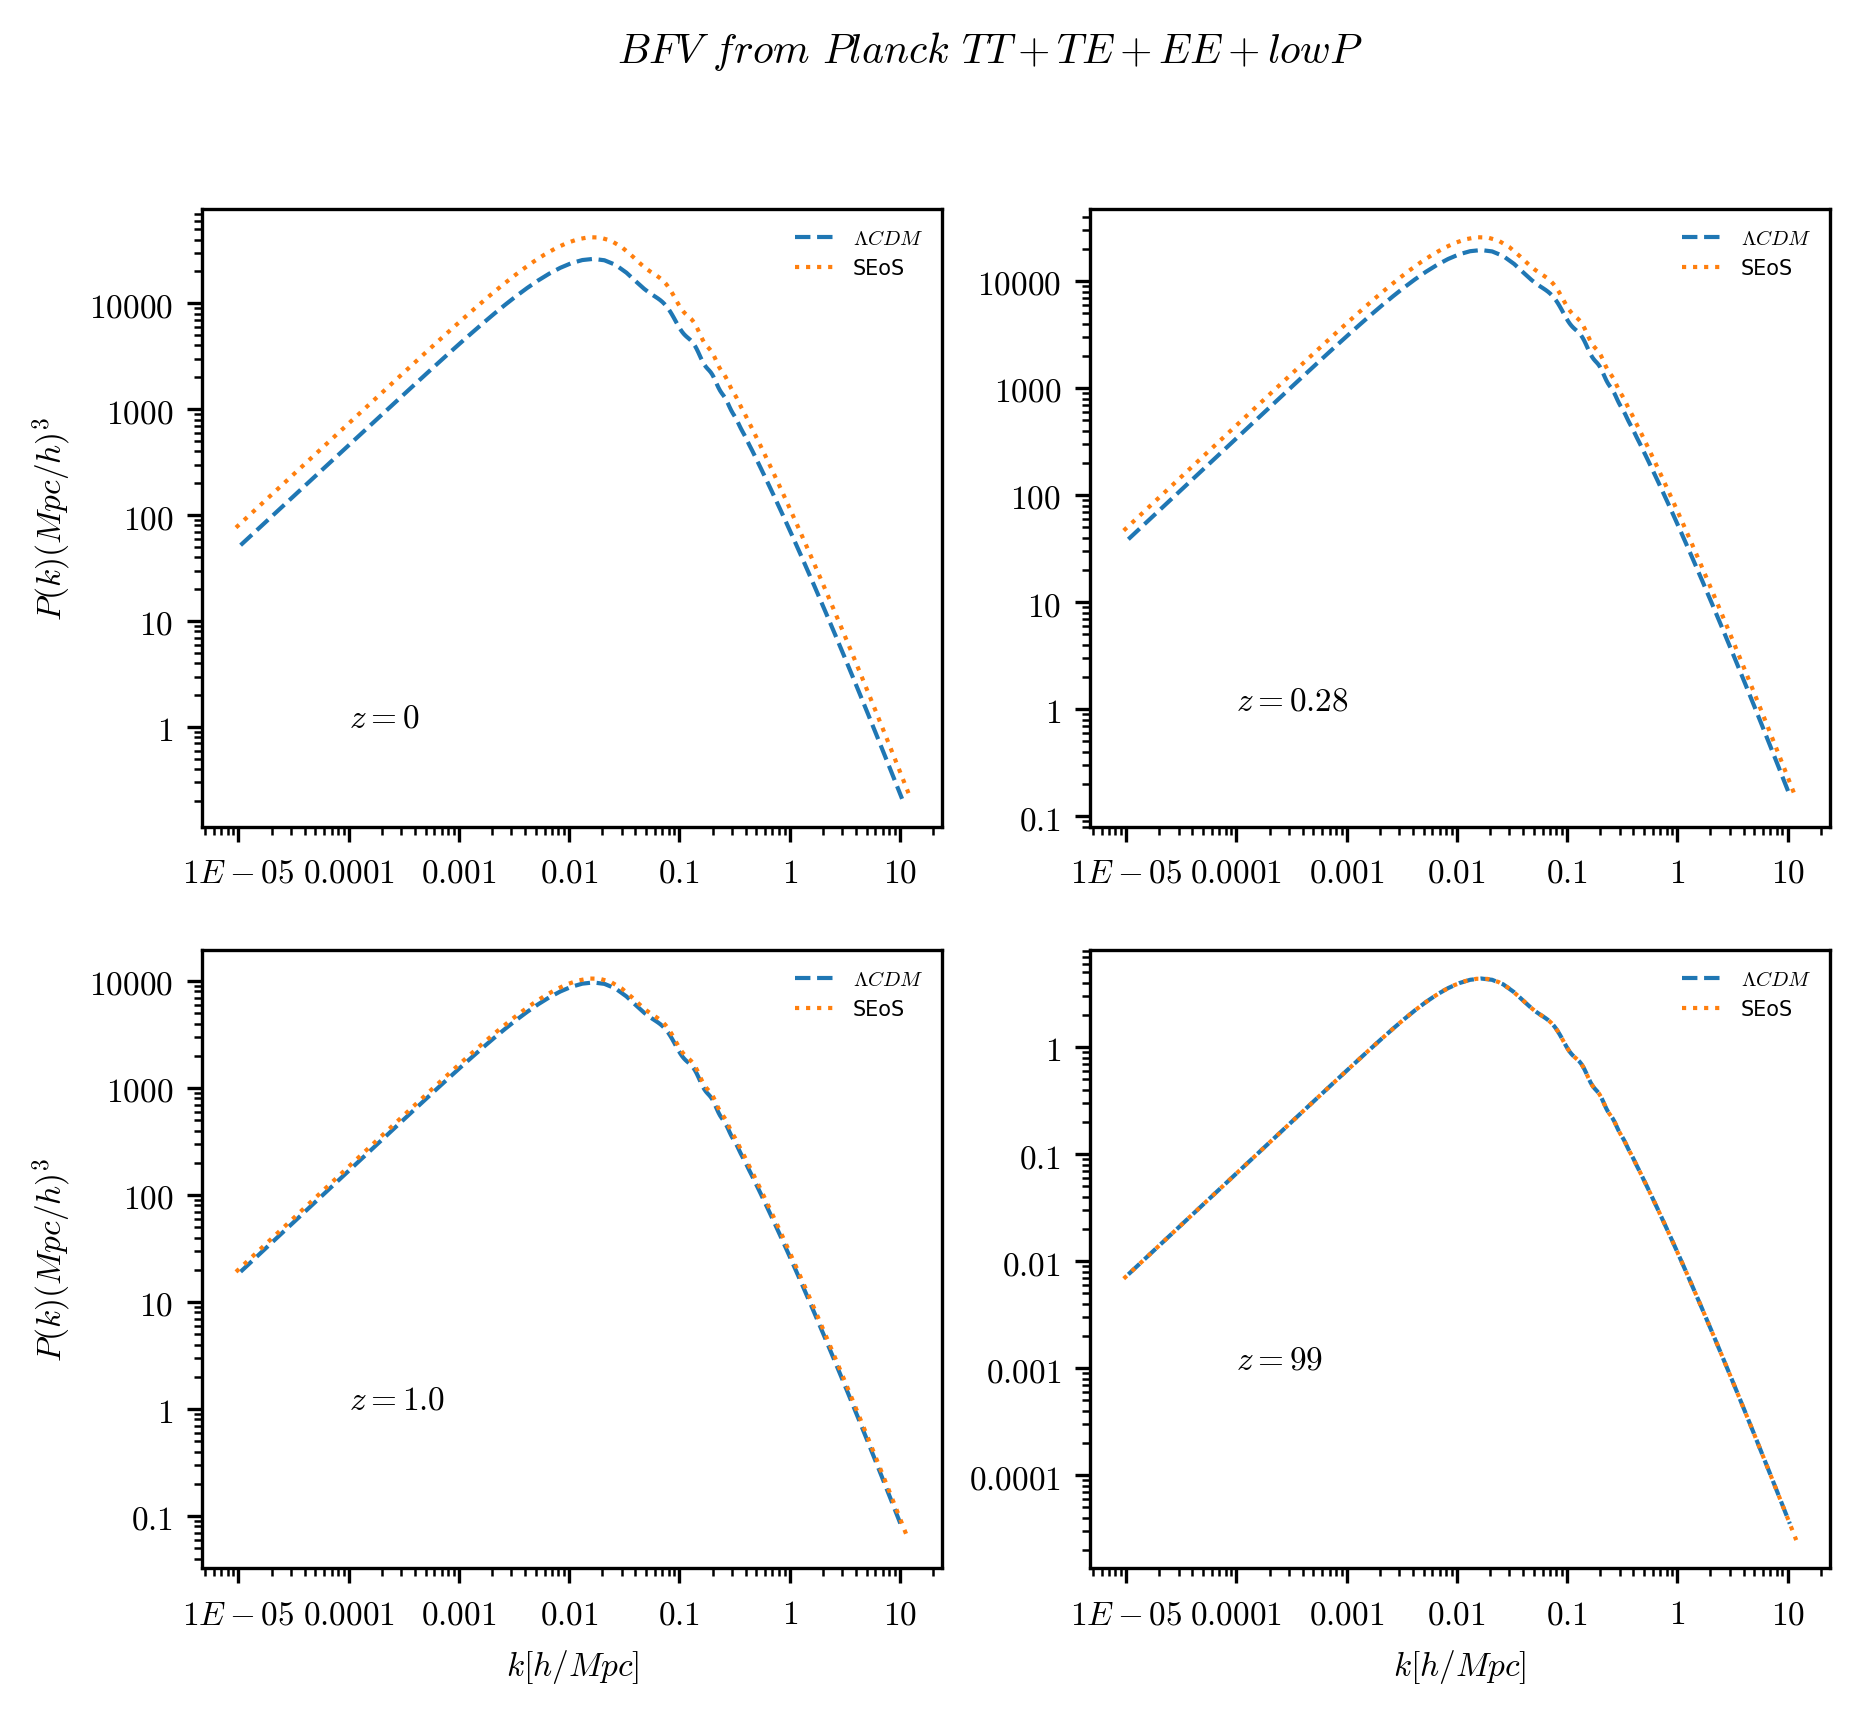

In [12]:
fig = plt.figure(figsize=(7,6), dpi=300)
rcParams['font.size'] = 8
rcParams['lines.linewidth'] = 1
rcParams['mathtext.fontset'] = 'cm'

fig.suptitle(r'$BFV$ $from$ $Planck$ $TT+TE+EE+lowP$', fontsize=10)

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

ax1.text(1e-4,1,r'$z=0$')
ax1.plot(pk_l_pTE_z0[:,0], pk_l_pTE_z0[:,1], label=label_l,ls=ls_l)
ax1.plot(pk_s_pTE_z0[:,0],pk_s_pTE_z0[:,1], label=label_s,ls=ls_s)
ax1.legend(loc='best', frameon=False, prop={'size':5})
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$P(k)(Mpc/h)^3$')
#ax1.set_xlabel(r'$k[h/Mpc]$')
ax1.xaxis.set_major_formatter(FancyFormatter())
ax1.yaxis.set_major_formatter(FancyFormatter())

ax2.text(1e-4,1,r'$z=0.28$')
ax2.plot(pk_l_pTE_z028[:,0], pk_l_pTE_z028[:,1], label=label_l,ls=ls_l)
ax2.plot(pk_s_pTE_z028[:,0],pk_s_pTE_z028[:,1], label=label_s,ls=ls_s)
ax2.legend(loc='best', frameon=False, prop={'size':5})
ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.set_xlabel(r'$k[h/Mpc]$')
ax2.xaxis.set_major_formatter(FancyFormatter())
ax2.yaxis.set_major_formatter(FancyFormatter())

ax3.text(1e-4,1,r'$z=1.0$')
ax3.plot(pk_l_pTE_z1[:,0], pk_l_pTE_z1[:,1], label=label_l,ls=ls_l)
ax3.plot(pk_s_pTE_z1[:,0],pk_s_pTE_z1[:,1], label=label_s,ls=ls_s)
ax3.legend(loc='best', frameon=False, prop={'size':5})
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel(r'$P(k)(Mpc/h)^3$')
ax3.set_xlabel(r'$k[h/Mpc]$')
ax3.xaxis.set_major_formatter(FancyFormatter())
ax3.yaxis.set_major_formatter(FancyFormatter())

ax4.text(1e-4,1e-3,r'$z=99$')
ax4.plot(pk_l_pTE_z99[:,0], pk_l_pTE_z99[:,1], label=label_l,ls=ls_l)
ax4.plot(pk_s_pTE_z99[:,0],pk_s_pTE_z99[:,1], label=label_s,ls=ls_s)
ax4.legend(loc='best', frameon=False, prop={'size':5})
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlabel(r'$k[h/Mpc]$')
ax4.xaxis.set_major_formatter(FancyFormatter())
ax4.yaxis.set_major_formatter(FancyFormatter())

#plt.savefig(figspath+'pk_bfv-pTTTEEElP.pdf', bbox_inches ='tight')

## Interpolating the arrays to make ratios

In [ ]:
karray = np.logspace(-5, 1)
#seos seos
pkssz0_func = interpolate.interp1d(pk_s_s_z0[:,0], pk_s_s_z0[:,1])
pkssz028_func = interpolate.interp1d(pk_s_s_z028[:,0], pk_s_s_z028[:,1])
pkssz1_func = interpolate.interp1d(pk_s_s_z1[:,0], pk_s_s_z1[:,1])
pkssz99_func = interpolate.interp1d(pk_s_s_z99[:,0], pk_s_s_z99[:,1])

pkssz0_int = pkssz0_func(karray)
pkssz028_int = pkssz028_func(karray)
pkssz1_int = pkssz1_func(karray)
pkssz99_int = pkssz99_func(karray)

#seos ptt
pkspTTz0_func = interpolate.interp1d(pk_s_pTT_z0[:,0], pk_s_pTT_z0[:,1])
pkspTTz028_func = interpolate.interp1d(pk_s_pTT_z028[:,0], pk_s_pTT_z028[:,1])
pkspTTz1_func = interpolate.interp1d(pk_s_pTT_z1[:,0], pk_s_pTT_z1[:,1])
pkspTTz99_func = interpolate.interp1d(pk_s_pTT_z99[:,0], pk_s_pTT_z99[:,1])

pkspTTz0_int = pkspTTz0_func(karray)
pkspTTz028_int = pkspTTz028_func(karray)
pkspTTz1_int = pkspTTz1_func(karray)
pkspTTz99_int = pkspTTz99_func(karray)

#seos ptt+te+ee
pkspTEz0_func = interpolate.interp1d(pk_s_pTE_z0[:,0], pk_s_pTE_z0[:,1])
pkspTEz028_func = interpolate.interp1d(pk_s_pTE_z028[:,0], pk_s_pTE_z028[:,1])
pkspTEz1_func = interpolate.interp1d(pk_s_pTE_z1[:,0], pk_s_pTE_z1[:,1])
pkspTEz99_func = interpolate.interp1d(pk_s_pTE_z99[:,0], pk_s_pTE_z99[:,1])

pkspTEz0_int = pkspTEz0_func(karray)
pkspTEz028_int = pkspTEz028_func(karray)
pkspTEz1_int = pkspTEz1_func(karray)
pkspTEz99_int = pkspTEz99_func(karray)

In [ ]:
karray = np.logspace(-4, 1)
#LCDM seos
pklsz0_func = interpolate.interp1d(pk_l_s_z0[:,0], pk_l_s_z0[:,1])
pklsz028_func = interpolate.interp1d(pk_l_s_z028[:,0], pk_l_s_z028[:,1])
pklsz1_func = interpolate.interp1d(pk_l_s_z1[:,0], pk_l_s_z1[:,1])
pklsz99_func = interpolate.interp1d(pk_l_s_z99[:,0], pk_l_s_z99[:,1])

pklsz0_int = pklsz0_func(karray)
pklsz028_int = pklsz028_func(karray)
pklsz1_int = pklsz1_func(karray)
pklsz99_int = pklsz99_func(karray)

#LCDM ptt
pklpTTz0_func = interpolate.interp1d(pk_l_pTT_z0[:,0], pk_l_pTT_z0[:,1])
pklpTTz028_func = interpolate.interp1d(pk_l_pTT_z028[:,0], pk_l_pTT_z028[:,1])
pklpTTz1_func = interpolate.interp1d(pk_l_pTT_z1[:,0], pk_l_pTT_z1[:,1])
pklpTTz99_func = interpolate.interp1d(pk_l_pTT_z99[:,0], pk_l_pTT_z99[:,1])

pklpTTz0_int = pklpTTz0_func(karray)
pklpTTz028_int = pklpTTz028_func(karray)
pklpTTz1_int = pklpTTz1_func(karray)
pklpTTz99_int = pklpTTz99_func(karray)

#LCDM ptt+te+ee
pklpTEz0_func = interpolate.interp1d(pk_l_pTE_z0[:,0], pk_l_pTE_z0[:,1])
pklpTEz028_func = interpolate.interp1d(pk_l_pTE_z028[:,0], pk_l_pTE_z028[:,1])
pklpTEz1_func = interpolate.interp1d(pk_l_pTE_z1[:,0], pk_l_pTE_z1[:,1])
pklpTEz99_func = interpolate.interp1d(pk_l_pTE_z99[:,0], pk_l_pTE_z99[:,1])

pklpTEz0_int = pklpTEz0_func(karray)
pklpTEz028_int = pklpTEz028_func(karray)
pklpTEz1_int = pklpTEz1_func(karray)
pklpTEz99_int = pklpTEz99_func(karray)

In [ ]:
plot(karray, pkspTTz028_int/pklpTTz028_int, label =r'Planck TT + lowP', ls='--')
plot(karray, pkspTEz028_int/pklpTEz028_int, label =r'Planck TT + TE+ EE lowP', ls=':')
plot(karray, pkssz028_int/pklsz028_int,label =r'SEoS')
title(r'$z=0.28$')
xscale('log')
xlabel(r'$k[h/Mpc]$')
ylabel(r'$P_{SEoS}(k)/P_{\Lambda CDM}(k)$')
legend(loc='best', frameon=False)
xlim(10e-4,4)
#xaxis.set_major_formatter(FancyFormatter())
#yaxis.set_major_formatter(FancyFormatter())

In [ ]:
fig = plt.figure(figsize=(7,6), dpi=300)
rcParams['font.size'] = 8
rcParams['lines.linewidth'] = 1
rcParams['mathtext.fontset'] = 'cm'

#fig.suptitle(r'BFV from Planck TT+lowP', fontsize=10)

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)


ax1.plot(karray, pkspTTz0_int/pklpTTz0_int, label =r'Planck TT + lowP', ls='--')
ax1.plot(karray, pkspTEz0_int/pklpTEz0_int, label =r'Planck TT + TE+ EE lowP', ls=':')
ax1.plot(karray, pkssz0_int/pklsz0_int,label =r'SEoS')
ax1.text(10e-4,1, r'$z=0$')
ax1.set_xscale('log')
ax1.set_ylabel(r'$P_{SEoS}(k)/P_{\Lambda CDM}(k)$')
ax1.legend(loc='best', frameon=False,prop={'size':5})
ax1.xaxis.set_major_formatter(FancyFormatter())
ax1.yaxis.set_major_formatter(FancyFormatter())

ax2.plot(karray, pkspTTz028_int/pklpTTz028_int, label =r'Planck TT + lowP', ls='--')
ax2.plot(karray, pkspTEz028_int/pklpTEz028_int, label =r'Planck TT + TE+ EE lowP', ls=':')
ax2.plot(karray, pkssz028_int/pklsz028_int,label =r'SEoS')
ax2.text(10e-4,1, r'$z=0.28$')
ax2.set_xscale('log')
ax2.legend(loc='best', frameon=False,prop={'size':5})
ax2.xaxis.set_major_formatter(FancyFormatter())
ax2.yaxis.set_major_formatter(FancyFormatter())

ax3.plot(karray, pkspTTz1_int/pklpTTz1_int, label =r'Planck TT + lowP', ls='--')
ax3.plot(karray, pkspTEz1_int/pklpTEz1_int, label =r'Planck TT + TE+ EE lowP', ls=':')
ax3.plot(karray, pkssz1_int/pklsz1_int,label =r'SEoS')
ax3.text(10e-4,1, r'$z=1$')
ax3.set_xscale('log')
ax3.set_xlabel(r'$k[h/Mpc]$')
ax3.set_ylabel(r'$P_{SEoS}(k)/P_{\Lambda CDM}(k)$')
ax3.legend(loc='best', frameon=False,prop={'size':5})
ax3.xaxis.set_major_formatter(FancyFormatter())
ax3.yaxis.set_major_formatter(FancyFormatter())

ax4.plot(karray, pkspTTz99_int/pklpTTz99_int, label =r'Planck TT + lowP', ls='--')
ax4.plot(karray, pkspTEz99_int/pklpTEz99_int, label =r'Planck TT + TE+ EE lowP', ls=':')
ax4.plot(karray, pkssz99_int/pklsz99_int,label =r'SEoS')
ax4.text(10e-4,1, r'$z=99$')
ax4.set_xscale('log')
ax4.set_xlabel(r'$k[h/Mpc]$')
ax4.legend(loc='best', frameon=False,prop={'size':5})
ax4.xaxis.set_major_formatter(FancyFormatter())
ax4.yaxis.set_major_formatter(FancyFormatter())

#plt.savefig(figspath+'pk_ratios.pdf', bbox_inches ='tight')

### Renaming the spectrum files

In [ ]:

p1 = pk_s_s_z0
p2 = pk_s_s_z028 
p3 = pk_s_s_z056 
p4 = pk_s_s_z1 
p5 = pk_s_s_z99 

p6 = pk_s_pTT_z0 
p7 = pk_s_pTT_z028 
p8 = pk_s_pTT_z056 
p9 = pk_s_pTT_z1 
p10 =pk_s_pTT_z99

p11 = pk_s_pTE_z0 
p12 = pk_s_pTE_z028 
p13 = pk_s_pTE_z056 
p14 = pk_s_pTE_z1 
p15 = pk_s_pTE_z99


####


p1a = pk_l_s_z0
p2a = pk_l_s_z028 
p3a = pk_l_s_z056 
p4a = pk_l_s_z1 
p5a = pk_l_s_z99 

p6a = pk_l_pTT_z0 
p7a = pk_l_pTT_z028 
p8a = pk_l_pTT_z056 
p9a = pk_l_pTT_z1 
p10a =pk_l_pTT_z99

p11a = pk_l_pTE_z0 
p12a = pk_l_pTE_z028 
p13a = pk_l_pTE_z056 
p14a = pk_l_pTE_z1 
p15a = pk_l_pTE_z99


### Loop over file names

In [ ]:
for i in arange(1,7):
    st = i
    
    seosseos = "bfv_z{0}_pk.dat".format(st)
    seosptt = "pTTlP_z{0}_pk.dat".format(st)
    seospte = "pTTTEEElP_z{0}_pk.dat".format(st)
    
    file_ss = seospath+seosseos
    file_sptt = seospath+seosptt
    file_spte = seospath+seospte
    
    pk_ss_i = np.loadtxt(file_ss)
    pk_sptt_i = np.loadtxt(file_sptt)
    pk_spte_i = np.loadtxt(file_spte)
    
    pk_ss = np.array([])
    pk_ss = append(pk_ss, pk_ss_i)
    pk_ss.shape

    
    #print pk_ss_i.shape
#print pk_ss.shape



for i in arange(1,7):
    st = i
    
    lseos = "-seosbfv_z{0}_pk.dat".format(st)
    lptt = "_pTTlP_z{0}_pk.dat".format(st)
    lpte = "-pTTTEEElP_z{0}_pk.dat".format(st)

    file_ls = lcdmpath+lseos
    file_lptt = lcdmpath+lptt
    file_lpte = lcdmpath+lpte
    
    pk_ls = np.loadtxt(file_ls)
    pk_lptt = np.loadtxt(file_lptt)
    pk_lpte = np.loadtxt(file_lpte)
    
    sh4 = pk_ls.shape
    sh5 = pk_lptt.shape
    sh6 = pk_lpte.shape
    
    #print sh4, sh5, sh6 

pk_ls.shape